In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df=pd.read_csv("/content/Final_Cleaned.csv")

In [2]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

# Missing Data Analysis

In [3]:
#Missing Data Analysis
missing_percentage = (df.isnull().mean()) * 100

print("Missing Data Analysis (Percentage):")
for column, percentage in missing_percentage.items():
    print(f"{column}: {percentage:.2f} ")

Missing Data Analysis (Percentage):
ID: 0.00 
Gender: 0.00 
Age: 0.00 
BMD: 0.00 
T Score: 0.00 
Diagnosis: 0.00 
DM: 0.00 
HTN: 0.00 
Vit D: 5.13 
Calcium: 2.93 
Menopause: 0.00 


# Gender Bar Chart



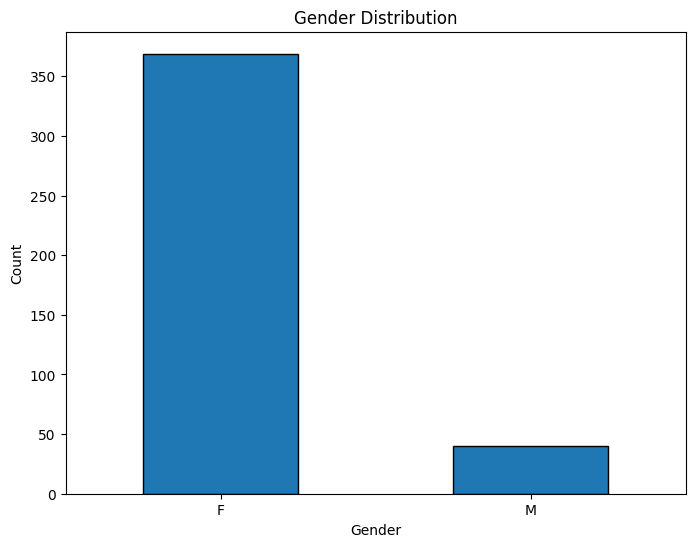

In [4]:
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_distribution.plot(
    kind='bar',
    edgecolor='black'
)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Menopause Bar Chart

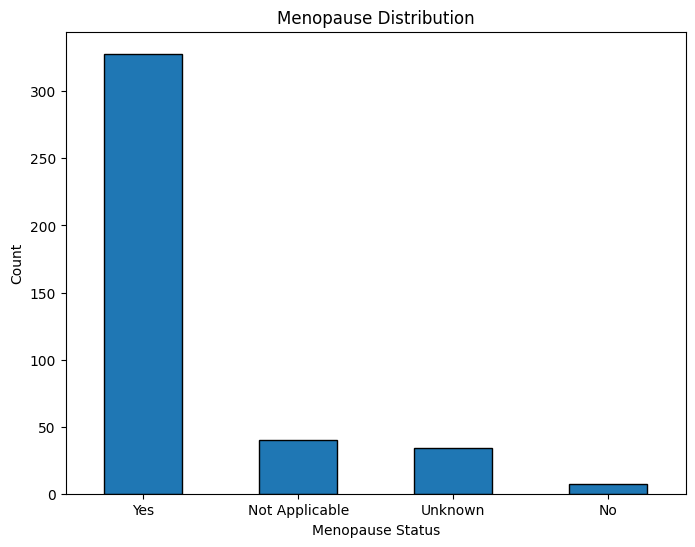

In [5]:
menopause_counts = df['Menopause'].value_counts()


plt.figure(figsize=(8, 6))
menopause_counts.plot(
    kind='bar',
    edgecolor='black'
)
plt.title('Menopause Distribution')
plt.xlabel('Menopause Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Percentage of Diagnosis

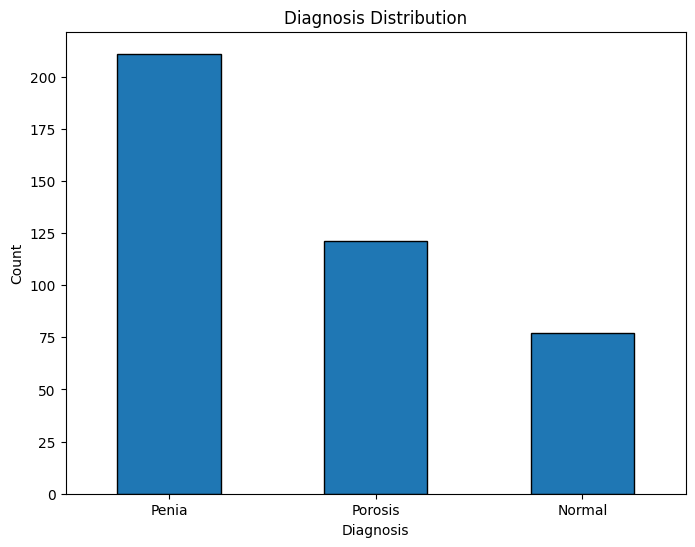

In [6]:
diagnosis_counts = df['Diagnosis'].value_counts()


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)


plt.figure(figsize=(8, 6))
diagnosis_counts.plot(
    kind='bar',
    edgecolor='black'
)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Age Distribution

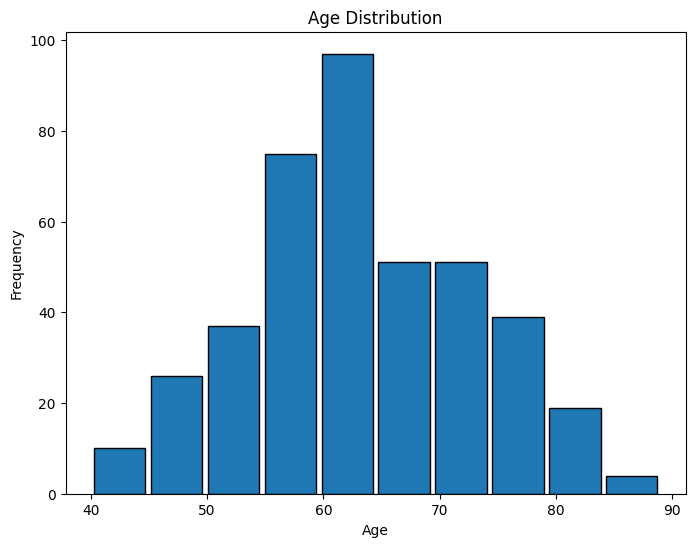

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(
    df['Age'],
    bins=10,
    edgecolor='black',
    rwidth=0.9
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

# BMD Distribution

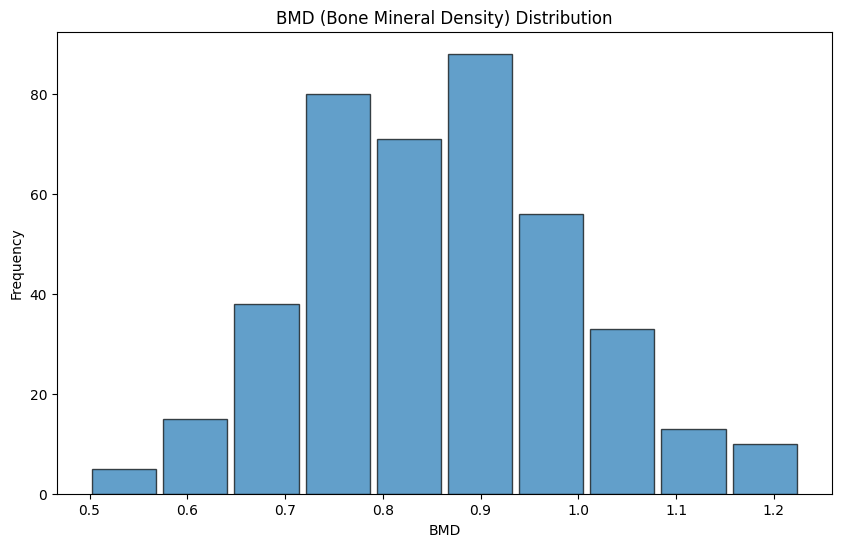

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(
    df['BMD'],
    bins=10,
    edgecolor='black',
    alpha=0.7,
    rwidth=0.9
)
plt.title('BMD (Bone Mineral Density) Distribution')
plt.xlabel('BMD')
plt.ylabel('Frequency')
plt.show()

# Age Distrubution in Woman

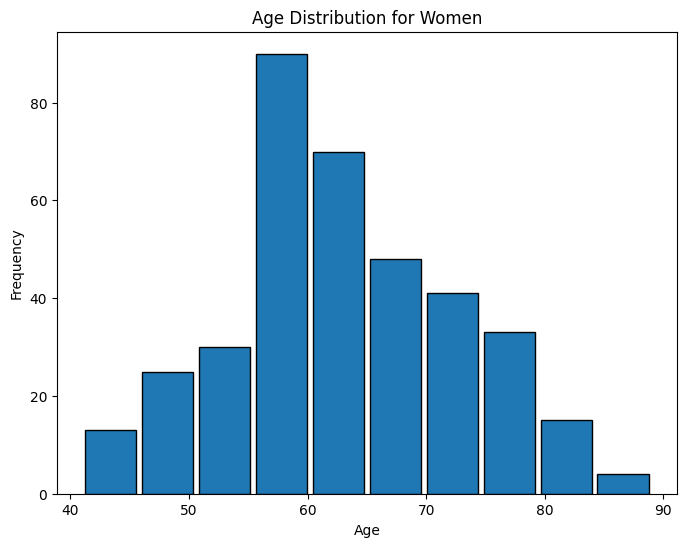

In [9]:

female_df = df[df['Gender'] == 'F']


plt.figure(figsize=(8, 6))
plt.hist(
    female_df['Age'],
    bins=10,
    edgecolor='black',
    rwidth=0.9
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Women')
plt.show()

# Boxplot BMD grouped by Diagnosis

<ipython-input-10-3bb675638792>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


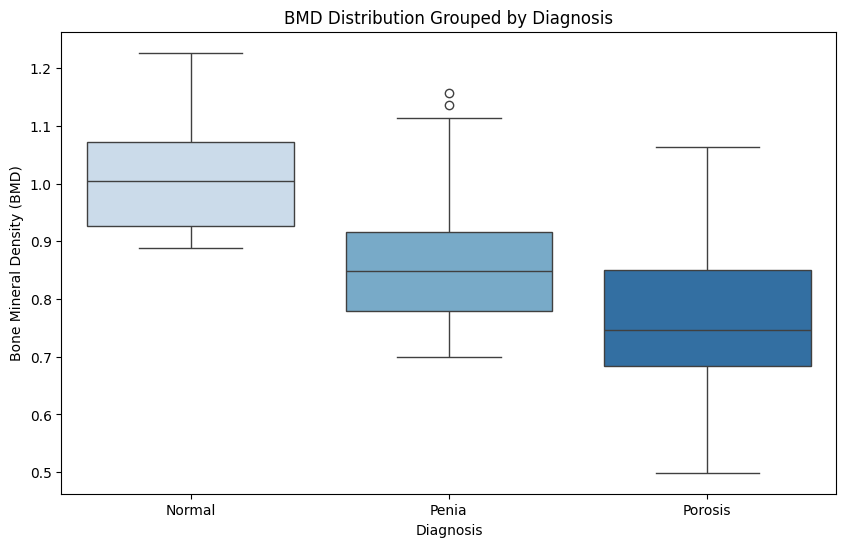

In [10]:

blue_palette = sns.color_palette("Blues", n_colors=3)


diagnosis_order = ['Normal', 'Penia', 'Porosis']

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Diagnosis',
    y='BMD',
    data=df,
    palette=blue_palette,
    order=diagnosis_order
)
plt.xlabel('Diagnosis')
plt.ylabel('Bone Mineral Density (BMD)')
plt.title('BMD Distribution Grouped by Diagnosis')
plt.show()

#  Boxplot T score grouped by diagnosis

<ipython-input-11-9738062c0b5f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


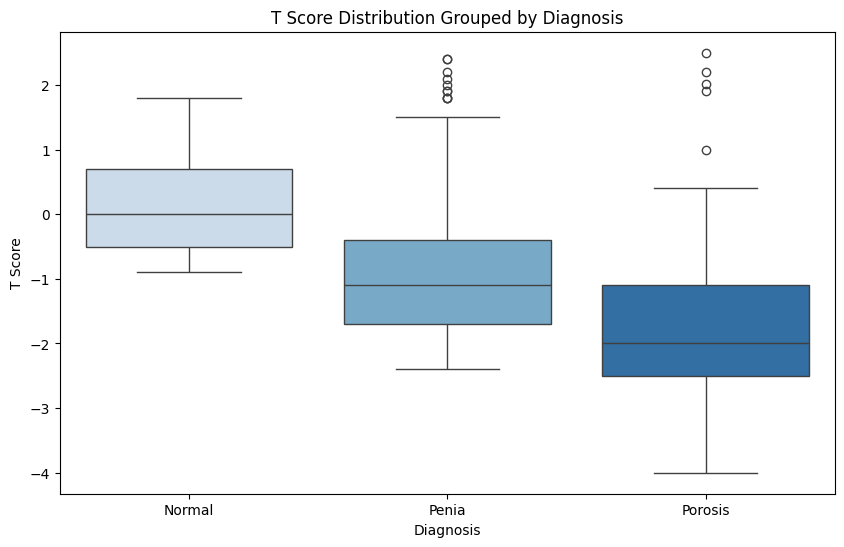

In [11]:
blue_palette = sns.color_palette("Blues", n_colors=3)


diagnosis_order = ['Normal', 'Penia', 'Porosis']


plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Diagnosis', y='T Score', data=df, palette=blue_palette, order=diagnosis_order
)
plt.xlabel('Diagnosis')
plt.ylabel('T Score')
plt.title('T Score Distribution Grouped by Diagnosis')
plt.show()

# Boxplot Age grouped by diagnosis

<ipython-input-12-dea85e1f5d5b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


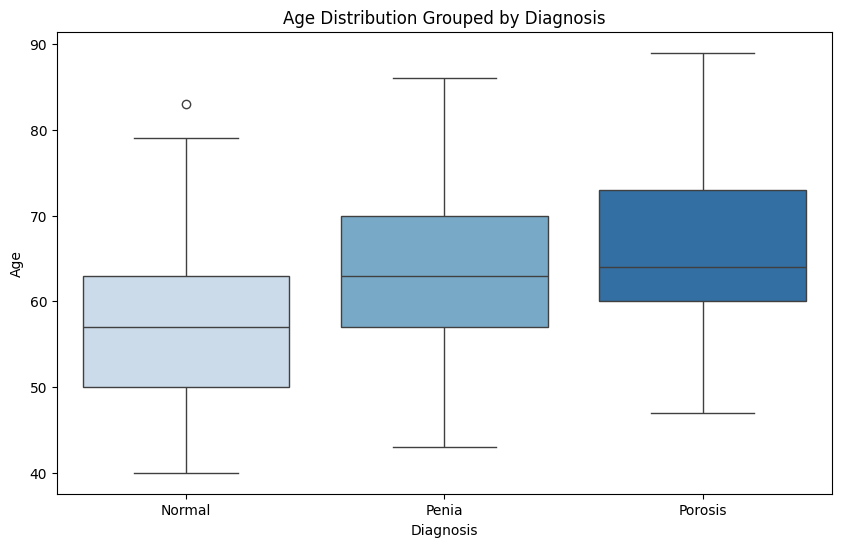

In [12]:
blue_palette = sns.color_palette("Blues", n_colors=3)


diagnosis_order = ['Normal', 'Penia', 'Porosis']


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Diagnosis',
    y='Age',
    palette=blue_palette,
    order=diagnosis_order
)
plt.title('Age Distribution Grouped by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

# T score vs Age

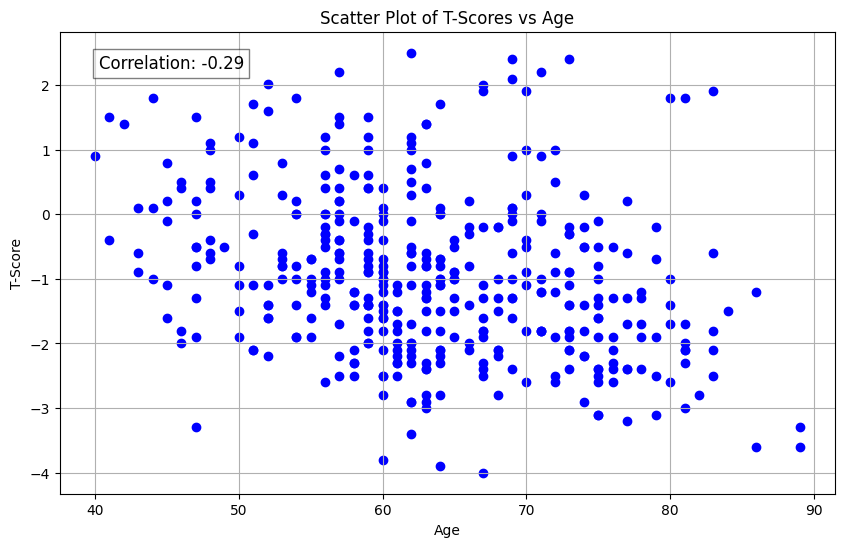

In [13]:
age = df["Age"]
T_score = df["T Score"]

correlation_coefficient = np.corrcoef(age, T_score)[0, 1]


plt.figure(figsize=(10, 6))
plt.scatter(age, T_score, color='blue', marker='o')


plt.title('Scatter Plot of T-Scores vs Age')
plt.xlabel('Age')
plt.ylabel('T-Score')


plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.grid(True)
plt.show()

# BMD VS AGE DISTRIBUTION

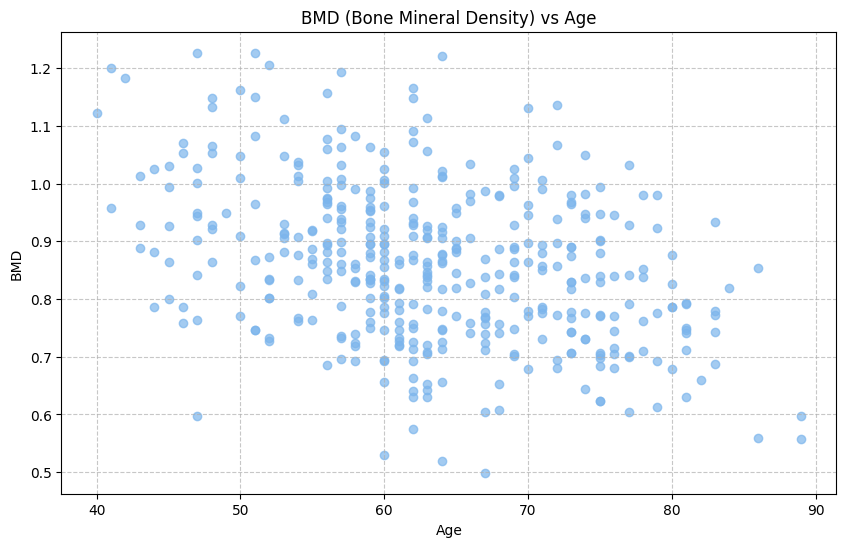

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['BMD'], color='#7cb5ec', alpha=0.7)
plt.title('BMD (Bone Mineral Density) vs Age')
plt.xlabel('Age')
plt.ylabel('BMD')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Menopause vs diagnosis

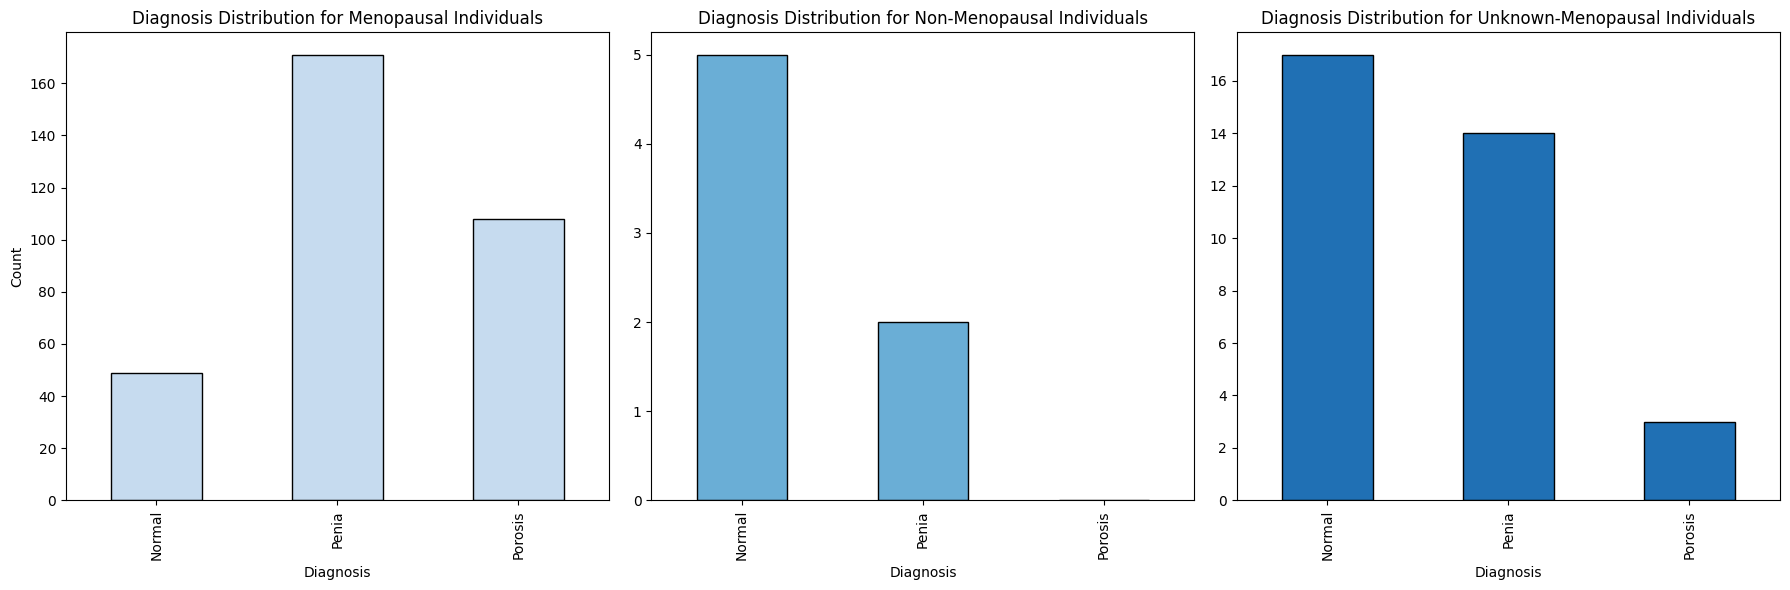

In [15]:
menopausal_df = df[df['Menopause'] == 'Yes']
non_menopausal_df = df[df['Menopause'] == 'No']
unknown_df = df[df['Menopause'] == 'Unknown']

diagnosis_order = ['Normal', 'Penia', 'Porosis']

menopausal_grouped = menopausal_df['Diagnosis'].value_counts().reindex(diagnosis_order, fill_value=0)
non_menopausal_grouped = non_menopausal_df['Diagnosis'].value_counts().reindex(diagnosis_order, fill_value=0)
unknown_grouped = unknown_df['Diagnosis'].value_counts().reindex(diagnosis_order, fill_value=0)

blue_palette = sns.color_palette("Blues", n_colors=3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

menopausal_grouped.plot(kind='bar', ax=axes[0], color=blue_palette[0], edgecolor='black')
axes[0].set_title('Diagnosis Distribution for Menopausal Individuals')
axes[0].set_ylabel('Count')

non_menopausal_grouped.plot(kind='bar', ax=axes[1], color=blue_palette[1], edgecolor='black')
axes[1].set_title('Diagnosis Distribution for Non-Menopausal Individuals')

unknown_grouped.plot(kind='bar', ax=axes[2], color=blue_palette[2], edgecolor='black')
axes[2].set_title('Diagnosis Distribution for Unknown-Menopausal Individuals')

plt.tight_layout()
plt.show()

In [16]:
df_clean=df.dropna()

# Correlation Categorical vs Categorical

In [17]:
#Gender vs Diagnosis
counts = df_clean.groupby(['Gender', 'Diagnosis']).size().unstack(fill_value=0)


male_diagnosed_positive = counts.loc['M', 'Penia']
male_diagnosed_negative = counts.loc['M', 'Porosis']
male_diagnosed_unknown = counts.loc['M', 'Normal']

female_diagnosed_positive = counts.loc['F', 'Penia']
female_diagnosed_negative = counts.loc['F', 'Porosis']
female_diagnosed_unknown = counts.loc['F', 'Normal']

observed_freq_GD = np.array([
    [male_diagnosed_positive, male_diagnosed_negative, male_diagnosed_unknown],
    [female_diagnosed_positive, female_diagnosed_negative, female_diagnosed_unknown]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_GD)


print("Chi-squared test for Gender vs. Diagnosis (GD):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")



Chi-squared test for Gender vs. Diagnosis (GD):
Chi-squared statistic: 1.2780617838934267
P-value: 0.5278036750663551


In [18]:
#Gender vs. HTN

counts = df_clean.groupby(['Gender', 'HTN']).size().unstack(fill_value=0)

male_htn_unavailable = counts.loc['M', 'Unavailable']
male_htn_no = counts.loc['M', 'No']
male_htn_yes = counts.loc['M', 'Yes']
female_htn_unavailable = counts.loc['F', 'Unavailable']
female_htn_no = counts.loc['F', 'No']
female_htn_yes = counts.loc['F', 'Yes']


observed_freq_GH = np.array([
    [male_htn_unavailable, male_htn_no, male_htn_yes],
    [female_htn_unavailable, female_htn_no, female_htn_yes]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_GH)


print("Chi-squared test for Gender vs. HTN:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared test for Gender vs. HTN:
Chi-squared statistic: 1.025435432776852
P-value: 0.5988658177538349


In [19]:
#Gender vs DM
counts = df_clean.groupby(['Gender', 'DM']).size().unstack(fill_value=0)


male_dm_unavailable = counts.loc['M', 'Unavailable']
male_dm_no = counts.loc['M', 'No']
male_dm_yes = counts.loc['M', 'Yes']
male_dm_pre = counts.loc['M', 'Pre']
female_dm_unavailable = counts.loc['F', 'Unavailable']
female_dm_no = counts.loc['F', 'No']
female_dm_yes = counts.loc['F', 'Yes']
female_dm_pre = counts.loc['F', 'Pre']


observed_freq_GD = np.array([
    [male_dm_unavailable, male_dm_no, male_dm_yes, male_dm_pre],
    [female_dm_unavailable, female_dm_no, female_dm_yes, female_dm_pre]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_GD)


print("Chi-squared test for Gender vs. DM:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test for Gender vs. DM:
Chi-squared statistic: 1.7937795215799839
P-value: 0.6162895163553237


In [20]:
#Gender vs. Menopause
counts = df_clean.groupby(['Gender', 'Menopause']).size().unstack(fill_value=0)


male_menopause_yes = counts.loc['M', 'Yes']
male_menopause_no = counts.loc['M', 'No']
male_menopause_unknown = counts.loc['M', 'Unknown']
male_menopause_not_applicable = counts.loc['M', 'Not Applicable']

female_menopause_yes = counts.loc['F', 'Yes']
female_menopause_no = counts.loc['F', 'No']
female_menopause_unknown = counts.loc['F', 'Unknown']
female_menopause_not_applicable = counts.loc['F', 'Not Applicable']


observed_freq_GM = np.array([
    [male_menopause_yes, male_menopause_no, male_menopause_unknown,male_menopause_not_applicable],
    [female_menopause_yes, female_menopause_no, female_menopause_unknown,female_menopause_not_applicable]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_GM)

print("Chi-squared test for Gender vs. Menopause:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test for Gender vs. Menopause:
Chi-squared statistic: 384.99999999999994
P-value: 3.927410845799229e-83


In [21]:
#diagnosis vs. HTN (DH)
counts = df_clean.groupby(['Diagnosis', 'HTN']).size().unstack(fill_value=0)


penia_htn_yes = counts.loc['Penia', 'Yes']
penia_htn_no = counts.loc['Penia', 'No']
penia_htn_unavailable = counts.loc['Penia', 'Unavailable']

porosis_htn_yes = counts.loc['Porosis', 'Yes']
porosis_htn_no = counts.loc['Porosis', 'No']
porosis_htn_unavailable = counts.loc['Porosis', 'Unavailable']

normal_htn_yes = counts.loc['Normal', 'Yes']
normal_htn_no = counts.loc['Normal', 'No']
normal_htn_unavailable = counts.loc['Normal', 'Unavailable']


observed_freq_DH = np.array([
    [penia_htn_yes, penia_htn_no, penia_htn_unavailable],
    [porosis_htn_yes, porosis_htn_no, porosis_htn_unavailable],
    [normal_htn_yes, normal_htn_no, normal_htn_unavailable]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_DH)

print("Chi-squared test for Diagnosis vs. HTN (DH):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test for Diagnosis vs. HTN (DH):
Chi-squared statistic: 6.80065524284168
P-value: 0.1468052172101203


In [22]:
#Diagnosis vs. DM (DM)
counts = df_clean.groupby(['Diagnosis', 'DM']).size().unstack(fill_value=0)


penia_dm_unavailable = counts.loc['Penia', 'Unavailable']
penia_dm_no = counts.loc['Penia', 'No']
penia_dm_yes = counts.loc['Penia', 'Yes']
penia_dm_pre = counts.loc['Penia', 'Pre']

porosis_dm_unavailable = counts.loc['Porosis', 'Unavailable']
porosis_dm_no = counts.loc['Porosis', 'No']
porosis_dm_yes = counts.loc['Porosis', 'Yes']
porosis_dm_pre = counts.loc['Porosis', 'Pre']

normal_dm_unavailable = counts.loc['Normal', 'Unavailable']
normal_dm_no = counts.loc['Normal', 'No']
normal_dm_yes = counts.loc['Normal', 'Yes']
normal_dm_pre = counts.loc['Normal', 'Pre']


observed_freq_DM = np.array([
    [penia_dm_unavailable, penia_dm_no, penia_dm_yes, penia_dm_pre],
    [porosis_dm_unavailable, porosis_dm_no, porosis_dm_yes, porosis_dm_pre],
    [normal_dm_unavailable, normal_dm_no, normal_dm_yes, normal_dm_pre]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_DM)


print("Chi-squared test for Diagnosis vs. DM (DM):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test for Diagnosis vs. DM (DM):
Chi-squared statistic: 1.239492870117368
P-value: 0.974889119230712


In [23]:
#Diagnois vs Menopause
counts = df_clean.groupby(['Menopause', 'Diagnosis']).size().unstack(fill_value=0)

yes_penia = counts.loc['Yes', 'Penia']
yes_normal = counts.loc['Yes', 'Normal']
yes_porosis = counts.loc['Yes', 'Porosis']

no_penia = counts.loc['No', 'Penia']
no_normal = counts.loc['No', 'Normal']
no_porosis = counts.loc['No', 'Porosis']

unknown_penia = counts.loc['Unknown', 'Penia']
unknown_normal = counts.loc['Unknown', 'Normal']
unknown_porosis = counts.loc['Unknown', 'Porosis']

not_applicable_penia=counts.loc['Not Applicable', 'Penia']
not_applicable_porosis=counts.loc['Not Applicable', 'Porosis']
not_applicable_normal=counts.loc['Not Applicable', 'Normal']


observed_freq_DP = np.array([
    [yes_penia, yes_normal, yes_porosis],
    [no_penia, no_normal, no_porosis],
    [unknown_penia, unknown_normal, unknown_porosis],
    [not_applicable_penia,not_applicable_normal,not_applicable_porosis]
])

chi2, p, dof, expected = chi2_contingency(observed_freq_DP)

print("Chi-squared test for Diagnosis vs. Menopause (DP):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared test for Diagnosis vs. Menopause (DP):
Chi-squared statistic: 41.05185196618664
P-value: 2.828352600521385e-07


In [24]:
#HTN and menopause
counts = df_clean.groupby(['HTN', 'Menopause']).size().unstack(fill_value=0)


unavailable_yes = counts.loc['Unavailable', 'Yes']
unavailable_no = counts.loc['Unavailable', 'No']
unavailable_unknown = counts.loc['Unavailable', 'Unknown']
unavailable_not_applicable = counts.loc['Unavailable', 'Not Applicable']

no_yes = counts.loc['No', 'Yes']
no_no = counts.loc['No', 'No']
no_unknown = counts.loc['No', 'Unknown']
no_not_applicable = counts.loc['No', 'Not Applicable']

yes_yes = counts.loc['Yes', 'Yes']
yes_no = counts.loc['Yes', 'No']
yes_unknown = counts.loc['Yes', 'Unknown']
yes_not_applicable = counts.loc['Yes', 'Not Applicable']




observed_freq_HM = np.array([
    [unavailable_yes, unavailable_no, unavailable_unknown,unavailable_not_applicable],
    [no_yes, no_no, no_unknown,no_not_applicable],
    [yes_yes, yes_no, yes_unknown,yes_not_applicable]
])


chi2, p, dof, expected = chi2_contingency(observed_freq_HM)


print("Chi-squared test for MENOPAUSE vs. HTN (HM):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared test for MENOPAUSE vs. HTN (HM):
Chi-squared statistic: 32.71220207412364
P-value: 1.1911028037686688e-05


In [25]:
#DM vs Menopause
counts = df_clean.groupby(['DM', 'Menopause']).size().unstack(fill_value=0)

unavailable_yes = counts.loc['Unavailable', 'Yes']
unavailable_no = counts.loc['Unavailable', 'No']
unavailable_unknown = counts.loc['Unavailable', 'Unknown']
unavailable_na = counts.loc['Unavailable', 'Not Applicable']

no_yes = counts.loc['No', 'Yes']
no_no = counts.loc['No', 'No']
no_unknown = counts.loc['No', 'Unknown']
no_na = counts.loc['No', 'Not Applicable']

yes_yes = counts.loc['Yes', 'Yes']
yes_no = counts.loc['Yes', 'No']
yes_unknown = counts.loc['Yes', 'Unknown']
yes_na = counts.loc['Yes', 'Not Applicable']

pre_yes = counts.loc['Pre', 'Yes']
pre_no = counts.loc['Pre', 'No']
pre_unknown = counts.loc['Pre', 'Unknown']
pre_na = counts.loc['Pre', 'Not Applicable']


observed_freq_MD = np.array([
    [unavailable_yes, unavailable_no, unavailable_unknown, unavailable_na],
    [no_yes, no_no, no_unknown, no_na],
    [yes_yes, yes_no, yes_unknown, yes_na],
    [pre_yes, pre_no, pre_unknown, pre_na]
])

chi2, p, dof, expected = chi2_contingency(observed_freq_MD)


print("Chi-squared test for MENOPAUSE vs. DM (MD):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")




Chi-squared test for MENOPAUSE vs. DM (MD):
Chi-squared statistic: 20.390531300042486
P-value: 0.0156494558603059


In [26]:
#HTN vs DM
counts = df_clean.groupby(['HTN', 'DM']).size().unstack(fill_value=0)


unavailable_unavailable = counts.loc['Unavailable', 'Unavailable']
unavailable_no = counts.loc['Unavailable', 'No']
unavailable_yes = counts.loc['Unavailable', 'Yes']
unavailable_pre = counts.loc['Unavailable', 'Pre']

no_unavailable = counts.loc['No', 'Unavailable']
no_no = counts.loc['No', 'No']
no_yes = counts.loc['No', 'Yes']
no_pre = counts.loc['No', 'Pre']

yes_unavailable = counts.loc['Yes', 'Unavailable']
yes_no = counts.loc['Yes', 'No']
yes_yes = counts.loc['Yes', 'Yes']
yes_pre = counts.loc['Yes', 'Pre']


observed_freq_HM = np.array([
    [unavailable_unavailable, unavailable_no, unavailable_yes, unavailable_pre],
    [no_unavailable, no_no, no_yes, no_pre],
    [yes_unavailable, yes_no, yes_yes, yes_pre]
])

chi2, p, dof, expected = chi2_contingency(observed_freq_HM)


print("Chi-squared test for HTN vs. DM (HM):")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared test for HTN vs. DM (HM):
Chi-squared statistic: 178.1741041844552
P-value: 8.285774944526638e-36


# Correlation Numerical vs Numerical

In [27]:
#Age and BMD
import scipy.stats as stats

correlation_coefficient, p_value = stats.pearsonr(df_clean['Age'], df_clean['BMD'])

print("Pearson correlation coefficient (STAT VALUE):", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient (STAT VALUE): -0.3824231559085851
P-value: 7.434264066116986e-15


In [28]:
#Age and Tscore
correlation_coefficient, p_value = stats.pearsonr(df_clean['Age'], df_clean['T Score'])

print("Pearson correlation coefficient (STAT VALUE):", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient (STAT VALUE): -0.3029126029249384
P-value: 1.3001481804069735e-09


In [29]:
#BMD and Calcuim
correlation_coefficient, p_value = stats.pearsonr(df_clean['BMD'], df_clean['Calcium'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)



Pearson correlation coefficient: 0.06505107453587049
P-value: 0.202807617558438


In [30]:
#vitamin D and BMD

correlation_coefficient, p_value = stats.pearsonr(df_clean['BMD'], df_clean['Vit D'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: -0.16790203296797976
P-value: 0.0009420935538144552


In [31]:
#Age and Vitamin D

correlation_coefficient, p_value = stats.pearsonr(df_clean['Age'], df_clean['Vit D'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.13361164784194587
P-value: 0.008667330089006267


In [32]:
#Tscore and Calcuim
correlation_coefficient, p_value = stats.pearsonr(df_clean['T Score'], df_clean['Calcium'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.04556297207852121
P-value: 0.3726254974755096


In [33]:
#BMD and Tscore

correlation_coefficient, p_value = stats.pearsonr(df_clean['BMD'], df_clean['T Score'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.7797880362209114
P-value: 6.560198742506291e-80


In [34]:
#Calcuim and Vitamin D


correlation_coefficient, p_value = stats.pearsonr(df_clean['Vit D'], df_clean['Calcium'])

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.03699794117282528
P-value: 0.4691643560378497


# Numerical Vs Categorical multiclass 3 or more

In [35]:
#Age and Diagnosis
model = ols("Age ~ C(Diagnosis)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Age'], df_clean['Diagnosis'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                    sum_sq     df          F        PR(>F)
C(Diagnosis)   4708.617227    2.0  27.460982  7.193859e-12
Residual      32749.954202  382.0        NaN           NaN

Tukey's HSD Post Hoc Analysis:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Normal   Penia   7.8786    0.0  4.8451  10.912   True
Normal Porosis  10.0866    0.0   6.805 13.3681   True
 Penia Porosis    2.208 0.1014 -0.3238  4.7398  False
-----------------------------------------------------


In [36]:
#Age and DM
model = ols("Age ~ C(DM)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Age'], df_clean['DM'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                sum_sq     df          F    PR(>F)
C(DM)      2798.099957    3.0  10.252564  0.000002
Residual  34660.471472  381.0        NaN       NaN

Tukey's HSD Post Hoc Analysis:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
         No         Pre   4.1752 0.3583  -2.4005 10.7509  False
         No Unavailable   3.1854 0.6469  -3.8468 10.2177  False
         No         Yes   5.6395    0.0   2.9872  8.2918   True
        Pre Unavailable  -0.9897 0.9928 -10.3159  8.3364  False
        Pre         Yes   1.4644 0.9421   -5.211  8.1397  False
Unavailable         Yes   2.4541 0.8107  -4.6714  9.5796  False
---------------------------------------------------------------


In [37]:
#Age and HTN
model = ols("Age ~ C(HTN)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Age'], df_clean['HTN'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                sum_sq     df         F        PR(>F)
C(HTN)     5418.988834    2.0  32.30463  1.091207e-13
Residual  32039.582594  382.0       NaN           NaN

Tukey's HSD Post Hoc Analysis:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
         No Unavailable   0.5915 0.9746 -5.8525  7.0355  False
         No         Yes   7.5687    0.0  5.3209  9.8166   True
Unavailable         Yes   6.9773 0.0286  0.5807 13.3738   True
--------------------------------------------------------------


In [38]:
#BMD and Diagnosis
model = ols("BMD ~ C(Diagnosis)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['BMD'], df_clean['Diagnosis'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                sum_sq     df           F        PR(>F)
C(Diagnosis)  3.000909    2.0  136.052484  2.429069e-45
Residual      4.212887  382.0         NaN           NaN

Tukey's HSD Post Hoc Analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Normal   Penia  -0.1628   0.0 -0.1972 -0.1284   True
Normal Porosis  -0.2609   0.0 -0.2981 -0.2237   True
 Penia Porosis  -0.0982   0.0 -0.1269 -0.0694   True
----------------------------------------------------


In [39]:
#T score and Diagnosis
model = ols("Q('T Score') ~ C(Diagnosis)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['T Score'], df_clean['Diagnosis'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                  sum_sq     df          F        PR(>F)
C(Diagnosis)  171.342149    2.0  75.839595  1.834725e-28
Residual      431.520639  382.0        NaN           NaN

Tukey's HSD Post Hoc Analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Normal   Penia  -1.1292   0.0 -1.4774  -0.781   True
Normal Porosis  -1.9652   0.0 -2.3419 -1.5885   True
 Penia Porosis   -0.836   0.0 -1.1266 -0.5454   True
----------------------------------------------------


In [40]:
#MENOPAUSE and Tscore
model = ols("Q('T Score') ~ C(Menopause)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['T Score'], df_clean['Menopause'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                  sum_sq     df         F    PR(>F)
C(Menopause)   23.956106    3.0  5.255468  0.001457
Residual      578.906683  381.0       NaN       NaN

Tukey's HSD Post Hoc Analysis:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
            No Not Applicable   -0.814 0.4382 -2.2138  0.5859  False
            No        Unknown  -0.1803 0.9876  -1.592  1.2314  False
            No            Yes  -0.9784  0.219 -2.2895  0.3327  False
Not Applicable        Unknown   0.6337 0.1403 -0.1279  1.3953  False
Not Applicable            Yes  -0.1645 0.8693 -0.7178  0.3889  False
       Unknown            Yes  -0.7981 0.0026 -1.3806 -0.2156   True
--------------------------------------------------------------------


In [41]:
#Vitamin D and Diagnosis
model = ols("Q('Vit D') ~ C(Diagnosis)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Vit D'], df_clean['Diagnosis'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                    sum_sq     df         F    PR(>F)
C(Diagnosis)   1936.497480    2.0  4.116233  0.017035
Residual      89856.686702  382.0       NaN       NaN

Tukey's HSD Post Hoc Analysis:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Normal   Penia    5.967 0.0151  0.9423 10.9917   True
Normal Porosis   5.4997 0.0466  0.0641 10.9354   True
 Penia Porosis  -0.4672 0.9628 -4.6609  3.7265  False
-----------------------------------------------------


In [42]:
#vitamin D and MENOPAAUSE
model = ols("Q('Vit D') ~ C(Menopause)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Vit D'], df_clean['Menopause'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                    sum_sq     df         F    PR(>F)
C(Menopause)   1412.482121    3.0  1.984774  0.115769
Residual      90380.702061  381.0       NaN       NaN

Tukey's HSD Post Hoc Analysis:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
            No Not Applicable  -1.7455  0.994 -19.2367 15.7458  False
            No        Unknown  -0.2394    1.0 -17.8779 17.3992  False
            No            Yes   3.7803 0.9334 -12.6016 20.1621  False
Not Applicable        Unknown   1.5061  0.977  -8.0099 11.0221  False
Not Applicable            Yes   5.5258 0.1675  -1.3881 12.4396  False
       Unknown            Yes   4.0197 0.4844  -3.2588 11.2981  False
---------------------------------------------------------------------


In [43]:
#Calcium and Menopause
model = ols("Calcium ~ C(Menopause)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Calcium'], df_clean['Menopause'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                  sum_sq     df        F    PR(>F)
C(Menopause)    1.423454    3.0  1.79072  0.148424
Residual      100.953051  381.0      NaN       NaN

Tukey's HSD Post Hoc Analysis:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
            No Not Applicable  -0.0529 0.9955 -0.6375 0.5317  False
            No        Unknown   0.2288 0.7486 -0.3607 0.8183  False
            No            Yes    0.082 0.9804 -0.4655 0.6295  False
Not Applicable        Unknown   0.2817 0.1032 -0.0364 0.5997  False
Not Applicable            Yes   0.1349 0.4349 -0.0962 0.3659  False
       Unknown            Yes  -0.1468 0.4044 -0.3901 0.0964  False
-------------------------------------------------------------------


In [44]:
#Calcium and Diagnosis
model = ols("Calcium ~ C(Diagnosis)", data=df_clean).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

posthoc = pairwise_tukeyhsd(df_clean['Calcium'], df_clean['Diagnosis'], alpha=0.05)
print("\nTukey's HSD Post Hoc Analysis:")
print(posthoc)

                  sum_sq     df         F    PR(>F)
C(Diagnosis)    0.105722    2.0  0.197445  0.820909
Residual      102.270783  382.0       NaN       NaN

Tukey's HSD Post Hoc Analysis:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
Normal   Penia   0.0196 0.9601 -0.1499 0.1891  False
Normal Porosis   0.0468 0.8202 -0.1366 0.2301  False
 Penia Porosis   0.0272 0.8935 -0.1143 0.1687  False
----------------------------------------------------


In [45]:
#BMD and Gender
male_BMD = df_clean[df_clean['Gender'] == 'M']['BMD']
female_BMD = df_clean[df_clean['Gender'] == 'F']['BMD']


t_stat, p_value = stats.ttest_ind(male_BMD, female_BMD)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.9660830766384177
P-value: 0.33461222563528425


In [46]:
#Tscore and Gender
male_t_scores = df_clean[df_clean['Gender'] == 'M']['T Score']
female_t_scores = df_clean[df_clean['Gender'] == 'F']['T Score']

t_stat, p_value = stats.ttest_ind(male_t_scores, female_t_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.3314591343645639
P-value: 0.7404789922408099


In [47]:
#Vitamin D and Gender
male_vitamin_d = df_clean[df_clean['Gender'] == 'M']['Vit D']
female_vitamin_d = df_clean[df_clean['Gender'] == 'F']['Vit D']

t_stat, p_value = stats.ttest_ind(male_vitamin_d, female_vitamin_d)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.9064168999502211
P-value: 0.057344299720185656
